In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.3.0
Running on TPU  ['10.95.226.226:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.95.226.226:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.95.226.226:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [2]:
import os
import zipfile

local_zip = '/content/drive/My Drive/k/k - Copy.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/My Drive/k')
zip_ref.close()

In [11]:
train_normal_dir = os.path.join('/content/drive/My Drive/k/k/dataset/train/normal')
test_normal_dir = os.path.join('/content/drive/My Drive/k/dataset/test/normal')

train_focal_dir = os.path.join('/content/drive/My Drive/k/k/dataset/train/focal')
test_focal_dir = os.path.join('/content/drive/My Drive/k/k/dataset/test/focal')

train_punctate_dir = os.path.join('/content/drive/My Drive/k/k/dataset/train/punctate')
test_punctate_dir = os.path.join('/content/drive/My Drive/k/k/dataset/test/punctate')

print('total training focal images:', len(os.listdir(train_focal_dir)))
print('total training normal images:', len(os.listdir(train_normal_dir)))
print('total training punctate images:', len(os.listdir(train_punctate_dir)))

total training focal images: 15
total training normal images: 33
total training punctate images: 5


In [12]:
focal_files = os.listdir(train_focal_dir)
print(focal_files[:10])

normal_files = os.listdir(train_normal_dir)
print(normal_files[:10])

punctate_files = os.listdir(train_punctate_dir)
print(punctate_files[:10])

['Early_montage-IM019551-IM019495.jpg', 'Early_montage-IM037884-IM037963.jpg', 'Late_montage-IM013308-IM013329.jpg', 'Late_montage-IM019564-IM019575.jpg', 'Late_montage-IM045310-IM045320.jpg', 'montage-IM001748-IM001753.jpg', 'montage-IM001764-IM001771.jpg', 'montage-IM001780-IM001806.jpg', 'montage-IM008916-IM009303.jpg', 'montage-IM009337-IM009258.jpg']
['1ffa9628-8d87-11e8-9daf-6045cb817f5b..JPG', '1ffa963a-8d87-11e8-9daf-6045cb817f5b..JPG', '1ffa9647-8d87-11e8-9daf-6045cb817f5b..JPG', '1ffa9629-8d87-11e8-9daf-6045cb817f5b..JPG', '1ffa963f-8d87-11e8-9daf-6045cb817f5b..JPG', '1ffa9649-8d87-11e8-9daf-6045cb817f5b..JPG', '1ffa962a-8d87-11e8-9daf-6045cb817f5b..JPG', '1ffa9640-8d87-11e8-9daf-6045cb817f5b..JPG', '1ffa964a-8d87-11e8-9daf-6045cb817f5b..JPG', '1ffa962b-8d87-11e8-9daf-6045cb817f5b..JPG']
['Early_montage-IM018217-IM018214.jpg', 'Early_montage-IM038388-IM038405.jpg', 'Early_montage-IM039535-IM039561.jpg', 'IM038448.JPG', 'IM039583.JPG']


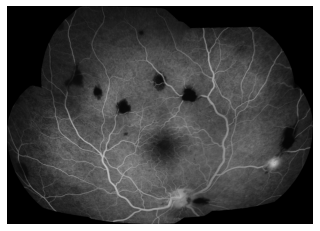

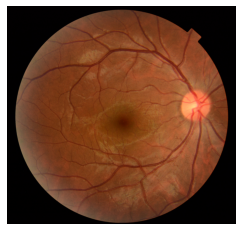

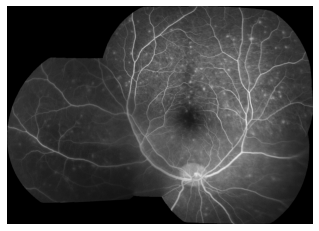

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_focal = [os.path.join(train_focal_dir, fname) 
                for fname in focal_files[pic_index-1:pic_index]] # Adjust the integer to change number of images displayed
next_normal = [os.path.join(train_normal_dir, fname) 
                for fname in normal_files[pic_index-1:pic_index]]
next_punctate = [os.path.join(train_punctate_dir, fname) 
                for fname in punctate_files[pic_index-1:pic_index]]

for i, img_path in enumerate(next_focal+next_normal+next_punctate):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img, cmap='gray') # Gray images display as false colours. Set cmap to 'gray'
  plt.axis('Off')
  plt.show()

In [14]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drive/My Drive/k/k/dataset/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=15,
	fill_mode="nearest")

VALIDATION_DIR = "/content/drive/My Drive/k/k/dataset/test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(512,512),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR, 
	target_size=(512 ,512),
	class_mode='categorical'
)

Found 53 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [15]:
COUNT_FOCAL = len(os.listdir(train_focal_dir))
COUNT_NORMAL = len(os.listdir(train_normal_dir))
COUNT_PUNCTATE = len(os.listdir(train_punctate_dir))


TRAIN_IMG_COUNT = COUNT_NORMAL + COUNT_FOCAL + COUNT_PUNCTATE
weight_for_0 = (1 / COUNT_NORMAL) * (TRAIN_IMG_COUNT) / 3.0
weight_for_1 = (1 / COUNT_FOCAL) * (TRAIN_IMG_COUNT) / 3.0
weight_for_2 = (1 / COUNT_PUNCTATE) * (TRAIN_IMG_COUNT) / 3.0

class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}
class_weight

{0: 0.5353535353535354, 1: 1.1777777777777778, 2: 3.5333333333333337}

In [16]:
IMAGE_SIZE = [512, 512]

In [26]:
def create_model():
  base_model = tf.keras.applications.Xception(input_shape=(512, 512, 3),
                                                include_top=False,
                                                weights='imagenet')
    
  base_model.trainable = False
    
  model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
  return model
        

In [ ]:
with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  model = create_model()

In [18]:
model = create_model()
NUM_TRAINING_IMAGES = 53
NUM_VALIDATION_IMAGES = 15

83689472/83683744 [==============================] - 0s 0us/step


In [19]:
# STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // BATCH_SIZE
# VALID_STEPS = NUM_VALIDATION_IMAGES // BATCH_SIZE

In [20]:
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(
    patience=2,
    min_delta=0.001,
    restore_best_weights=True,
)

lr_scheduler = callbacks.ReduceLROnPlateau(
    patience=0,
    factor=0.2,
    min_lr=0.001,
)

In [22]:


METRICS = [
        tf.keras.metrics.CategoricalAccuracy(),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
    ]
model.compile(
        optimizer='adam',
        loss="categorical_crossentropy",
        metrics=METRICS,
    )
history = model.fit(
    train_generator,
    epochs=100,
    #steps_per_epoch=2,
    validation_data=validation_generator,
    #validation_steps=2,
    callbacks=[early_stopping, lr_scheduler],
    class_weight=class_weight
)


Epoch 1/100
2/2 [==============================] - 51s 26s/step - loss: 0.2531 - categorical_accuracy: 0.8679 - precision: 0.8846 - recall: 0.8679 - val_loss: 0.5356 - val_categorical_accuracy: 0.7333 - val_precision: 0.7333 - val_recall: 0.7333
Epoch 2/100
2/2 [==============================] - 38s 19s/step - loss: 0.2209 - categorical_accuracy: 0.8679 - precision: 0.8846 - recall: 0.8679 - val_loss: 0.5166 - val_categorical_accuracy: 0.7333 - val_precision: 0.7333 - val_recall: 0.7333
Epoch 3/100
2/2 [==============================] - 49s 25s/step - loss: 0.2188 - categorical_accuracy: 0.8868 - precision: 0.8846 - recall: 0.8679 - val_loss: 0.5006 - val_categorical_accuracy: 0.7333 - val_precision: 0.7333 - val_recall: 0.7333
Epoch 4/100
2/2 [==============================] - 38s 19s/step - loss: 0.1942 - categorical_accuracy: 0.9057 - precision: 0.9057 - recall: 0.9057 - val_loss: 0.5011 - val_categorical_accuracy: 0.7333 - val_precision: 0.7333 - val_recall: 0.7333
Epoch 5/100
2/2 

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(["precision", "recall", "categorical_accuracy", "loss"]):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history["val_" + met])
    ax[i].set_title("Model {}".format(met))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(met)
    ax[i].legend(["train", "val"])

In [25]:
model.save('malaria_net_model.h5')